In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import cv2
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Read Image data


In [2]:
subject = 'leo'
n_trial = 49
date = '12_15_2020'
i_start = 0
i_end = 5000

img_file_path = r'C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V5 Incline\Test_Subject_' + subject + r'\test'+str(n_trial)+ r'\depth_processed_' + subject + '_test' + str(n_trial) + '.avi'

cap = cv2.VideoCapture(img_file_path)
image_data_i = []


for data_idx in range(i_start, i_end):
    # Read depth image data
    cap.set(1, data_idx-1)
    res, frame = cap.read()
    gray_frame = frame/255
    ex_img_data = cv2.resize(gray_frame, \
                                        (80, 60),\
                                        interpolation = cv2.INTER_NEAREST)
    image_data_i.append(ex_img_data) 

        

# Read Output Data


In [3]:
# Read ground truth data
sc_y = StandardScaler()
qtm_file_path = r'C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V5 Incline\Test_Subject_' + subject + r'\test'+str(n_trial)+ r'\qtm_processed_' + subject + '_test' + str(n_trial) +'_' + date + '.txt'

qtm_data_raw = pd.read_csv(qtm_file_path)
qtm_data_all = (qtm_data_raw.values[:,0].reshape(-1,1))
y = qtm_data_all[i_start:i_end, :]
y = sc_y.fit_transform(y)


# Display Single Image

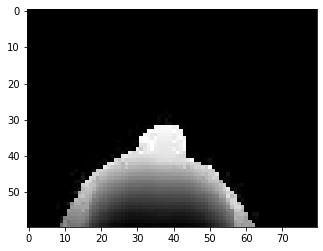

In [4]:
image = image_data_i[120]
plt.imshow(image)

In [5]:
print("Min and max pixel values:", np.array(image).min(), np.array(image).max())

Min and max pixel values: 0.0 1.0


# Data Augmentation

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(height_factor = (-0.4,0.4),
                                               width_factor = (-0.2,0.2), 
                                               fill_mode = 'nearest'),
    layers.experimental.preprocessing.RandomRotation(0.05)], 
    name='data_augmentation')

In [13]:
0.2 * pi * 2

NameError: name 'pi' is not defined

In [15]:
# Add the image to a batch
image_batch = tf.expand_dims(image, 0)

(1, 60, 80, 3)
(1, 60, 80, 3)
(1, 60, 80, 3)
(1, 60, 80, 3)
(1, 60, 80, 3)
(1, 60, 80, 3)
(1, 60, 80, 3)
(1, 60, 80, 3)
(1, 60, 80, 3)


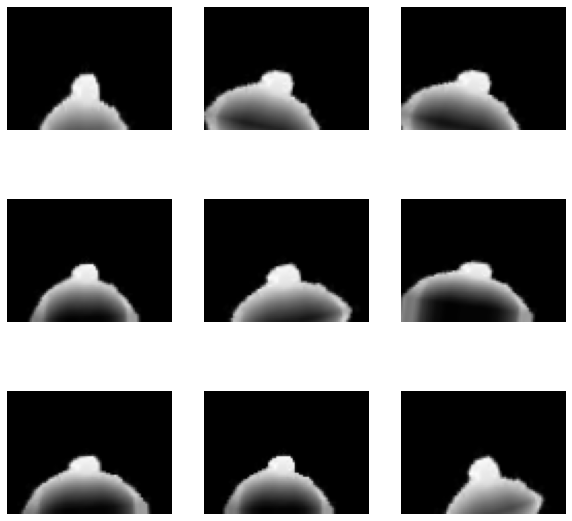

In [16]:
# Show example of data augmentation
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image_batch)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")
    print(augmented_image.shape)

# Add Data Augmentation into the Model

In [9]:
model = tf.keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model
])

# Train Model


In [10]:
from tensorflow.keras.layers import Bidirectional, Conv2D, MaxPooling2D, Input, concatenate, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Dropout, Reshape, Permute, Flatten
from tensorflow.keras.models import Model
# add model here

model_start = Input(shape=(image.shape[0],image.shape[1],image.shape[2]))

model_data_aug = data_augmentation(model_start)

# Add your model here 
model_cnn = model_data_aug

model_cnn = Conv2D(filters=16, kernel_size=(3, 3),padding='same')(model_cnn)
model_cnn = Activation('relu')(model_cnn)
model_cnn = AveragePooling2D(pool_size=(2, 2))(model_cnn)

model_cnn = Flatten()(model_cnn)

model_cnn = Dense(128)(model_cnn)
model_cnn = Activation('relu')(model_cnn)

output = Dense(1)(model_cnn)
output = Activation('linear', name='thetaz_out')(output)
model = Model(inputs=[model_start],outputs=output)

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse','mae'])


callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=50,restore_best_weights=True) #Moving to 1000 patience. 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 80, 3)]       0         
_________________________________________________________________
data_augmentation (Sequentia (None, 60, 80, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 80, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 60, 80, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 30, 40, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               245772

In [11]:
epochs = int(10)
batch_size = 256
history = model.fit(np.array(image_data_i), 
                    np.array(y), 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    callbacks = [callback], 
                    verbose=2)



Epoch 1/10
20/20 - 5s - loss: 1.0142 - mse: 1.6010 - mae: 1.0142
Epoch 2/10
20/20 - 4s - loss: 0.8713 - mse: 1.0063 - mae: 0.8713
Epoch 3/10
20/20 - 4s - loss: 0.8650 - mse: 1.0135 - mae: 0.8650
Epoch 4/10
20/20 - 5s - loss: 0.8674 - mse: 1.0249 - mae: 0.8674
Epoch 5/10
20/20 - 5s - loss: 0.8636 - mse: 1.0072 - mae: 0.8636
Epoch 6/10
20/20 - 7s - loss: 0.8585 - mse: 1.0165 - mae: 0.8585
Epoch 7/10
20/20 - 6s - loss: 0.8556 - mse: 1.0116 - mae: 0.8556
Epoch 8/10
20/20 - 5s - loss: 0.8577 - mse: 1.0209 - mae: 0.8577
Epoch 9/10
20/20 - 5s - loss: 0.8453 - mse: 0.9913 - mae: 0.8453
Epoch 10/10
20/20 - 5s - loss: 0.8427 - mse: 0.9890 - mae: 0.8427


# Predict using Model

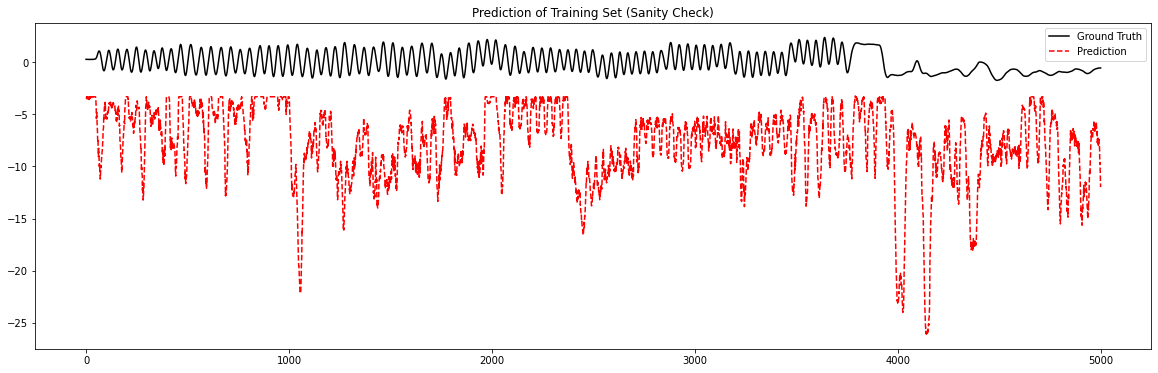

Average error is -7.76 degrees
Root Mean Squared Error is 7.76 degrees
Mean Absolute Error is 7.76 degrees


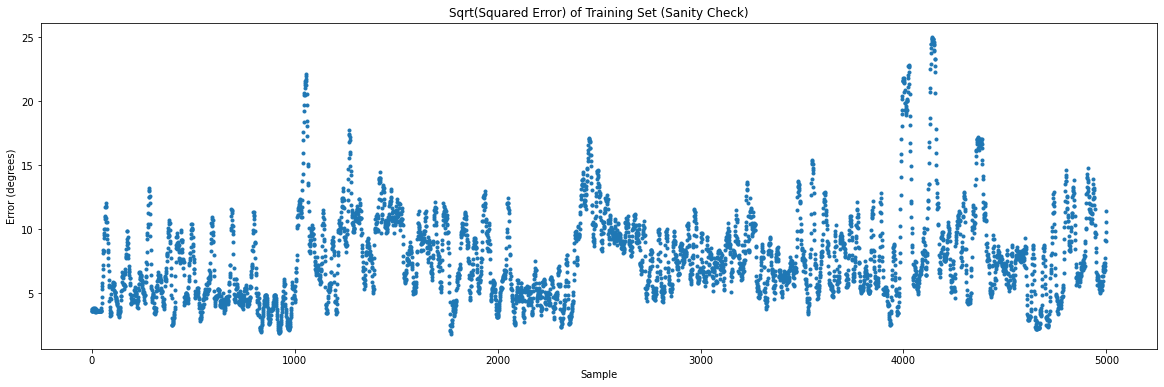

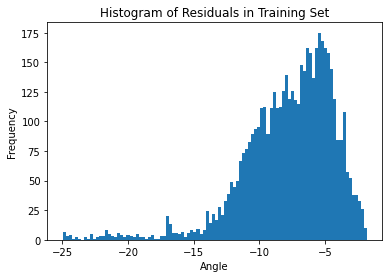

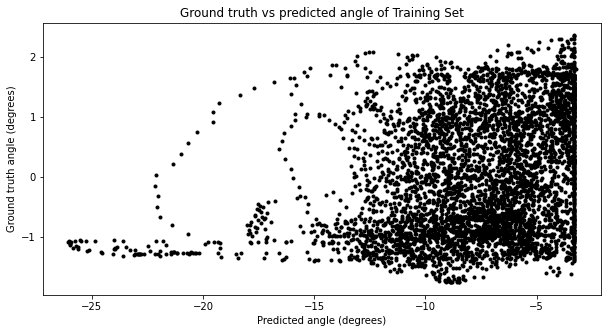

In [12]:
# sanity check with 80% data
Xtrainz = np.array(image_data_i)
y_pred = model.predict(Xtrainz)
y_pred = sc_y.inverse_transform(y_pred)

y_new = y
plt.figure(figsize=(20,6))
plt.plot(y_new,'k')
plt.plot(y_pred,'r--')
plt.title('Prediction of Training Set (Sanity Check)')
#plt.axis([xmin, xmax, ymin, ymax])
plt.legend(labels=['Ground Truth','Prediction'])
plt.show()
# Squared-root of Squared Error

test_error = (y_pred - y_new)
print('Average error is {:4.2f} degrees'.format(np.sum(test_error)/test_error.shape[0]))
rmse = np.sqrt(test_error**2)
print('Root Mean Squared Error is {:4.2f} degrees'.format(np.sum(rmse)/test_error.shape[0]))
# Mean absolute error
print('Mean Absolute Error is {:4.2f} degrees'.format(np.sum(np.abs(test_error))/test_error.shape[0]))
plt.figure(figsize=(20,6))
plt.plot(rmse,'.')
plt.title('Sqrt(Squared Error) of Training Set (Sanity Check)')
plt.xlabel('Sample')
plt.ylabel('Error (degrees)')
plt.show()

plt.figure()
plt.hist(test_error,bins=100)
plt.title('Histogram of Residuals in Training Set')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.show()

#plot scatterplot of data
plt.figure(figsize=(10,5))
plt.scatter(y_pred,y_new,marker='.',color='black')
plt.xlabel('Predicted angle (degrees)')
plt.ylabel('Ground truth angle (degrees)')
plt.title('Ground truth vs predicted angle of Training Set')
plt.show()